In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 

from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [7]:
batch_size = 100
img_height = 250
img_width = 250

## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [6]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [18]:
## CNN Model Initialization
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 250, 250, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                      

In [17]:
## Train CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=[checkpoint])

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 3.7470 - accuracy: 0.4501
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to model_weights.h5
8/8 [==============================] - 28s 3s/step - loss: 3.7470 - accuracy: 0.4501 - val_loss: 0.6993 - val_accuracy: 0.5306
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.5196
Epoch 2: val_accuracy did not improve from 0.53061
8/8 [==============================] - 26s 3s/step - loss: 0.6979 - accuracy: 0.5196 - val_loss: 0.7257 - val_accuracy: 0.5306
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5474
Epoch 3: val_accuracy did not improve from 0.53061
8/8 [==============================] - 26s 3s/step - loss: 0.6872 - accuracy: 0.5474 - val_loss: 0.6805 - val_accuracy: 0.5306
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.5714
Epoch 4: val_accuracy did not improve from 0.53061
8/8 [=======

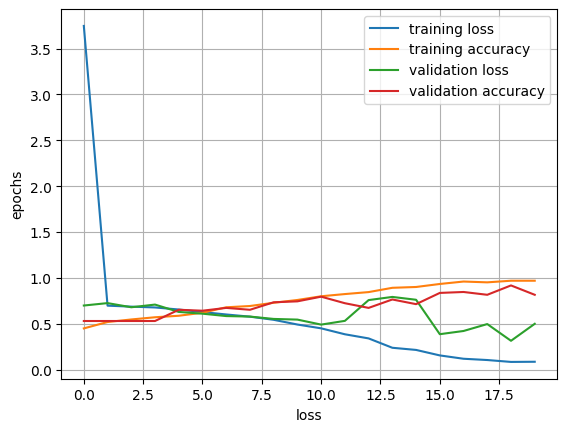

In [24]:
## Write model to json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Training data stats
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid(True)
plt.legend()

plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()